# Association Rule - Movies Dataset

In [41]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt

In [42]:
mov = pd.read_csv("my_movies.csv")

In [43]:
mov.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


creating new df with binary values only

In [44]:
mov_set = mov.iloc[:,5:]

#### Apply apriori algorith to binary df

In [45]:
freq_items= apriori(mov_set,min_support=0.2,max_len=3,use_colnames=True)

In [46]:
freq_items.sort_values('support',ascending=False,inplace=True)

In [47]:
len(freq_items)

13

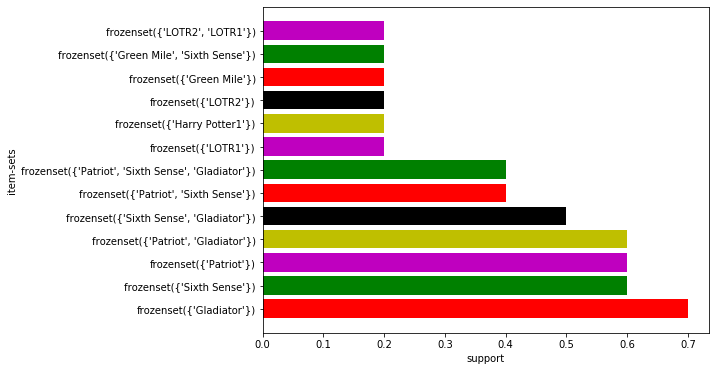

In [51]:
plt.figure(figsize=(8,6))
plt.barh(y = list(range(1,14)),width = freq_items.support[0:13],color='rgmyk');
plt.yticks(list(range(1,14)),freq_items.itemsets[0:13],rotation=0)
plt.ylabel('item-sets');
plt.xlabel('support');

### Above bar plot shows itemsets with corresponding support 

### Lets create rules with metric as lift 

In [52]:
rules = association_rules(freq_items,metric='lift',min_threshold=1)

In [53]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
2,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
3,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
4,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


In [54]:
rules.sort_values('lift',ascending=False,inplace=True)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
14,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
15,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
12,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
13,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8


#### from above df we can see that there are lot of redundancy among rules, so lets remove them

In [55]:
def to_list(i):
    return (sorted(list(i)))

ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)
ma_X = ma_X.apply(sorted)
rules_sets = list(ma_X)
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))
rules_no_redudancy  = rules.iloc[index_rules,:]

In [56]:
rules_no_redudancy.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
14,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
12,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
2,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
4,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


#### From above set of rules we can say that Green Mile, Sixth Sence, Patriot, Gladiator can be bunched together.

#### Lets plot support vs confidence for the rules

In [59]:
support=rules_no_redudancy.as_matrix(columns=['support']);
confidence=rules_no_redudancy.as_matrix(columns=['confidence']);

C:\Users\ABHAY\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\ABHAY\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


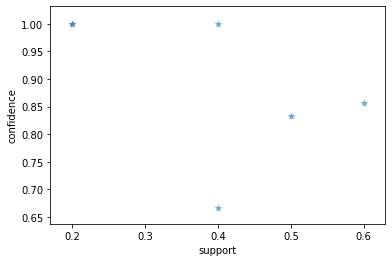

In [60]:
plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence');

#### From above graph we see that rule 1 and 2 are overlapping, hence we can remove Green Mile from above group that we just thought off. 
#### Therefore if we see rule no 4 i.e. antecedent (Patriot, Sixth Sense) and consequence(Gladiator) perfectly applies to our new group formed. 